In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
centralized_trees = pd.read_csv('../data/centralized_data/n_estimators.csv', nrows=28)
centralized_pearson_corr = pd.read_csv('../data/centralized_data/n_estimators_pearson_corr_unchange.csv', nrows=28)

best_forests_data = pd.read_csv('../data/simulation/best_forests_strategy_sim.csv')
best_trees_data = pd.read_csv('../data/simulation/best_trees_strategy_sim.csv')
random_strat_data = pd.read_csv('../data/simulation/random_strategy_sim.csv')
#threshold_data = pd.read_csv('../data/simulation/threshold_strategy_sim_trees.csv', nrows=79)
threshold_data = pd.read_csv('../data/simulation/threshold_strategy_sim.csv')

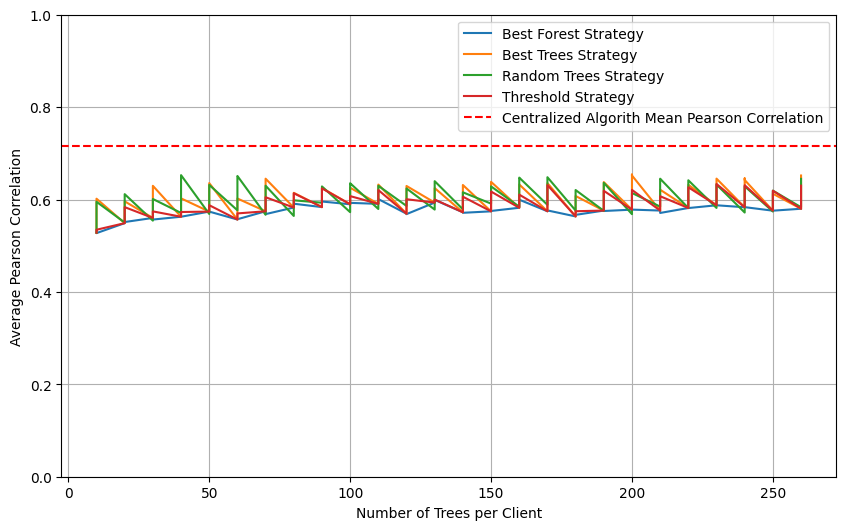

In [3]:
# Calcular a média das colunas pearson (1 a 4)
best_forests_data['pearson_mean'] = best_forests_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
best_trees_data['pearson_mean'] = best_trees_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
threshold_data['pearson_mean'] = threshold_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)
random_strat_data['pearson_mean'] = random_strat_data[['pearson_corr1', 'pearson_corr2', 'pearson_corr3', 'pearson_corr4']].mean(axis=1)


centralized_mean = centralized_pearson_corr['pearson_corr'].mean()

plt.figure(figsize=(10, 6))
plt.plot(best_forests_data['trees_by_client'], best_forests_data['pearson_mean'], label=f'Best Forest Strategy')
plt.plot(best_trees_data['trees_by_client'], best_trees_data['pearson_mean'], label=f'Best Trees Strategy')
plt.plot(random_strat_data['trees_by_client'], random_strat_data['pearson_mean'], label=f'Random Trees Strategy')
plt.plot(threshold_data['trees_by_client'], threshold_data['pearson_mean'], label=f'Threshold Strategy')
plt.axhline(y=centralized_mean, color='r', linestyle='--', label=f'Centralized Algorith Mean Pearson Correlation')
# plt.title('Pearson Correlation by Number of Trees for each client')
plt.xlabel('Number of Trees per Client')
plt.ylabel('Average Pearson Correlation')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


In [4]:
best_trees_data['pearson_mean'].max()

0.6540980294397367

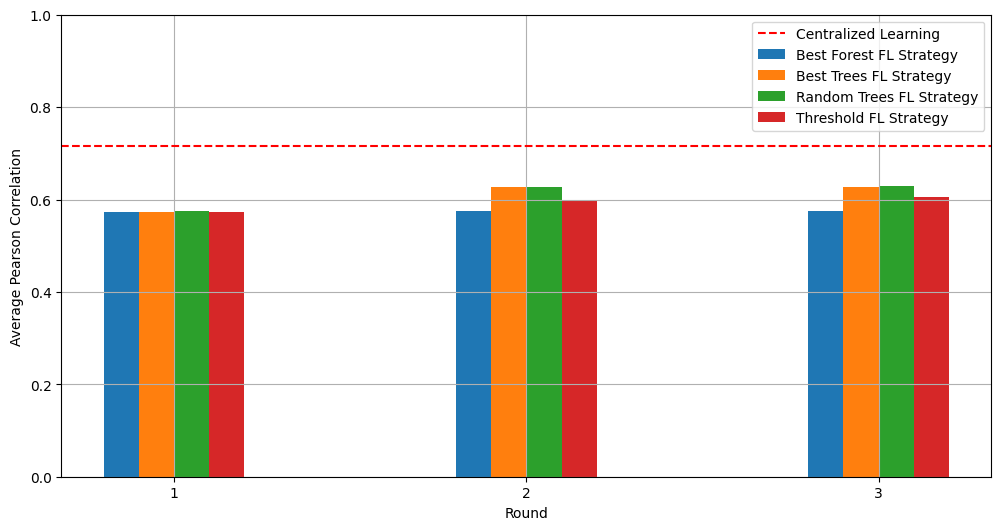

In [5]:
# Calcular a média das colunas pearson (1 a 4) para cada estratégia
best_forests_mean = best_forests_data.groupby('round')['pearson_mean'].mean()
best_trees_mean = best_trees_data.groupby('round')['pearson_mean'].mean()
random_strat_mean = random_strat_data.groupby('round')['pearson_mean'].mean()
threshold_mean = threshold_data.groupby('round')['pearson_mean'].mean()

# Nomes das estratégias
strategies = ['Best Forest FL Strategy', 'Best Trees FL Strategy', 'Random Trees FL Strategy', 'Threshold FL Strategy']

# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
bar_positions = range(1, len(best_forests_mean.index) * 2 + 1, 2)

# Centralizado
plt.axhline(y=centralized_mean, color='r', linestyle='--', label=f'Centralized Learning')

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_mean, width=bar_width, label='Best Forest FL Strategy')

# Estratégia Melhores Árvores
plt.bar([pos + bar_width for pos in bar_positions], best_trees_mean, width=bar_width, label='Best Trees FL Strategy')

# Estratégia Árvores Aleatórias
plt.bar([pos + 2 * bar_width for pos in bar_positions], random_strat_mean, width=bar_width, label='Random Trees FL Strategy')

# Estratégia Threshold
plt.bar([pos + 3 * bar_width for pos in bar_positions], threshold_mean, width=bar_width, label='Threshold FL Strategy')

# Configurações do gráfico
plt.xlabel('Round')
plt.ylabel('Average Pearson Correlation')
plt.xticks([pos + 1.5 * bar_width for pos in bar_positions], best_forests_mean.index)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

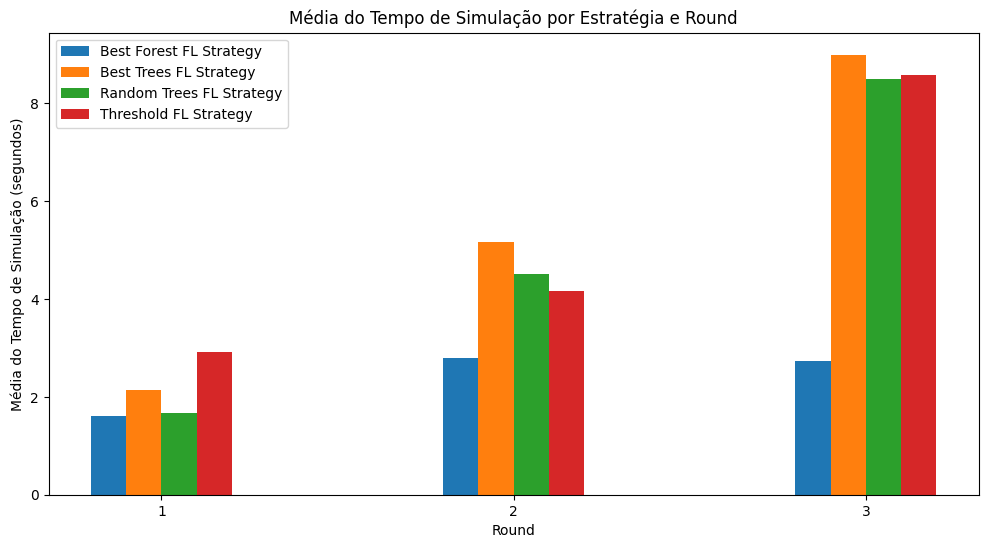

In [7]:
import matplotlib.pyplot as plt

# Supondo que você tenha os DataFrames best_forests_data, best_trees_data, random_strat_data e threshold_data

# Calcular a média da coluna 'sim_time' para cada estratégia
best_forests_mean = best_forests_data.groupby('round')['sim_time'].mean()
best_trees_mean = best_trees_data.groupby('round')['sim_time'].mean()
random_strat_mean = random_strat_data.groupby('round')['sim_time'].mean()
threshold_mean = threshold_data.groupby('round')['sim_time'].mean()


# Criar o gráfico de barras dividido por round
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
bar_positions = range(1, len(best_forests_mean.index) * 2 + 1, 2)

# Estratégia Melhores Florestas
plt.bar(bar_positions, best_forests_mean, width=bar_width, label='Best Forest FL Strategy')

# Estratégia Melhores Árvores
plt.bar([pos + bar_width for pos in bar_positions], best_trees_mean, width=bar_width, label='Best Trees FL Strategy')

# Estratégia Árvores Aleatórias
plt.bar([pos + 2 * bar_width for pos in bar_positions], random_strat_mean, width=bar_width, label='Random Trees FL Strategy')

# Estratégia Threshold
plt.bar([pos + 3 * bar_width for pos in bar_positions], threshold_mean, width=bar_width, label='Threshold FL Strategy')

# Configurações do gráfico
plt.xlabel('Round')
plt.ylabel('Média do Tempo de Simulação (segundos)')
plt.title('Média do Tempo de Simulação por Estratégia e Round')
plt.xticks([pos + 1.5 * bar_width for pos in bar_positions], best_forests_mean.index)
plt.legend()
plt.show()
